In [2]:
!pip install imageio

     |████████████████████████████████| 3.3 MB 13.1 MB/s eta 0:00:01
You should consider upgrading via the '/usr/bin/python3.8 -m pip install --upgrade pip' command.


'\nfig, ax = plt.subplots(figsize=(16,10))\nplt.cla()\nax.set_title(\'Regression Analysis - model 3, Batches\', fontsize=35)\nax.set_xlabel(\'Independent variable\', fontsize=24)\nax.set_ylabel(\'Dependent variable\', fontsize=24)\nax.set_xlim(-11.0, 13.0)\nax.set_ylim(-1.1, 1.2)\nax.scatter(x.data.numpy(), y.data.numpy(), color = "blue", alpha=0.2)\nprediction = net(x)     # input x and predict based on x\nax.scatter(x.data.numpy(), prediction.data.numpy(), color=\'green\', alpha=0.5)\nplt.savefig(\'/content/figs/curve_2_model_3_batches.png\')\n'

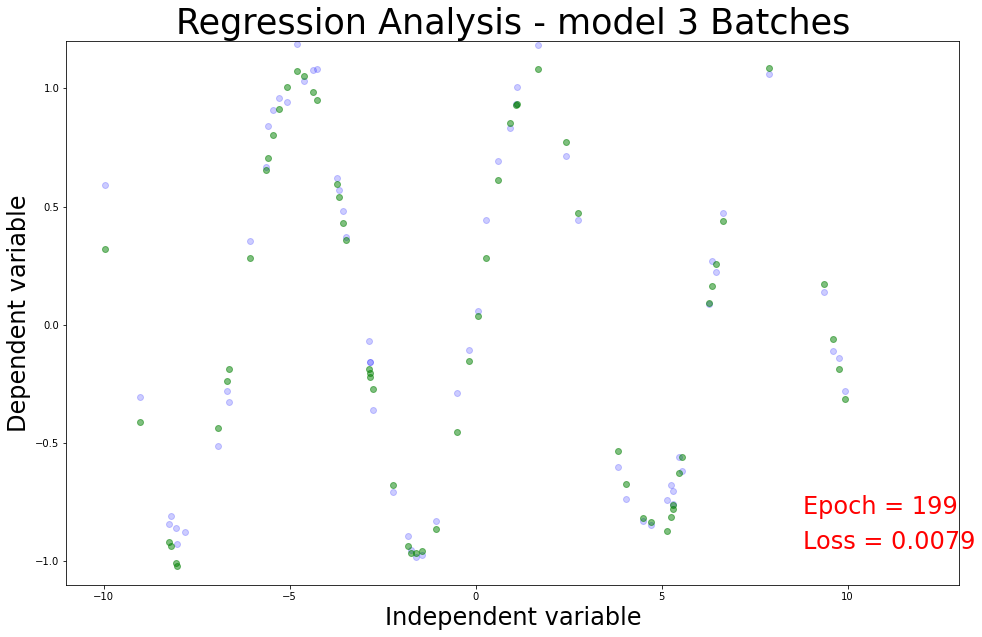

In [8]:
import torch
from torch.autograd import Variable
import torch.nn.functional as F
import torch.utils.data as Data

import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import imageio

torch.manual_seed(1)    # reproducible

x = torch.unsqueeze(torch.linspace(-10, 10, 1000), dim=1)  # x data (tensor), shape=(100, 1)
y = torch.sin(x) + 0.2*torch.rand(x.size())                 # noisy y data (tensor), shape=(100, 1)

# torch can only train on Variable, so convert them to Variable
x, y = Variable(x), Variable(y)
'''
plt.figure(figsize=(10,4))
plt.scatter(x.data.numpy(), y.data.numpy(), color = "blue")
plt.title('Regression Analysis')
plt.xlabel('Independent varible')
plt.ylabel('Dependent varible')
plt.savefig('/content/figs/curve_2.png')
'''
# another way to define a network
net = torch.nn.Sequential(
        torch.nn.Linear(1, 200),
        torch.nn.LeakyReLU(),
        torch.nn.Linear(200, 100),
        torch.nn.LeakyReLU(),
        torch.nn.Linear(100, 1),
    )

optimizer = torch.optim.Adam(net.parameters(), lr=0.01)
loss_func = torch.nn.MSELoss()  # this is for regression mean squared loss

BATCH_SIZE = 64
EPOCH = 200

torch_dataset = Data.TensorDataset(x, y)

loader = Data.DataLoader(
    dataset=torch_dataset, 
    batch_size=BATCH_SIZE, 
    shuffle=True, num_workers=2,)

my_images = []
fig, ax = plt.subplots(figsize=(16,10))

# start training
for epoch in range(EPOCH):
    for step, (batch_x, batch_y) in enumerate(loader): # for each training step
        
        b_x = Variable(batch_x)
        b_y = Variable(batch_y)

        prediction = net(b_x)     # input x and predict based on x

        loss = loss_func(prediction, b_y)     # must be (1. nn output, 2. target)

        optimizer.zero_grad()   # clear gradients for next train
        loss.backward()         # backpropagation, compute gradients
        optimizer.step()        # apply gradients

        if step == 1:
            # plot and show learning process
            plt.cla()
            ax.set_title('Regression Analysis - model 3 Batches', fontsize=35)
            ax.set_xlabel('Independent variable', fontsize=24)
            ax.set_ylabel('Dependent variable', fontsize=24)
            ax.set_xlim(-11.0, 13.0)
            ax.set_ylim(-1.1, 1.2)
            ax.scatter(b_x.data.numpy(), b_y.data.numpy(), color = "blue", alpha=0.2)
            ax.scatter(b_x.data.numpy(), prediction.data.numpy(), color='green', alpha=0.5)
            ax.text(8.8, -0.8, 'Epoch = %d' % epoch,
                    fontdict={'size': 24, 'color':  'red'})
            ax.text(8.8, -0.95, 'Loss = %.4f' % loss.data.numpy(),
                    fontdict={'size': 24, 'color':  'red'})

            # Used to return the plot as an image array 
            # (https://ndres.me/post/matplotlib-animated-gifs-easily/)
            fig.canvas.draw()       # draw the canvas, cache the renderer
            image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
            image  = image.reshape(fig.canvas.get_width_height()[::-1] + (3,))

            my_images.append(image)

    


# save images as a gif    
imageio.mimsave('/content/figs/curve_2_model_3_batch.gif', my_images, fps=12)

'''
fig, ax = plt.subplots(figsize=(16,10))
plt.cla()
ax.set_title('Regression Analysis - model 3, Batches', fontsize=35)
ax.set_xlabel('Independent variable', fontsize=24)
ax.set_ylabel('Dependent variable', fontsize=24)
ax.set_xlim(-11.0, 13.0)
ax.set_ylim(-1.1, 1.2)
ax.scatter(x.data.numpy(), y.data.numpy(), color = "blue", alpha=0.2)
prediction = net(x)     # input x and predict based on x
ax.scatter(x.data.numpy(), prediction.data.numpy(), color='green', alpha=0.5)
plt.savefig('/content/figs/curve_2_model_3_batches.png')
'''

In [11]:
from IPython.display import HTML
HTML('<img src="/content/figs/curve_2_model_3_batch.gif">')

In [9]:
x 

tensor([[-10.0000],
        [ -9.9800],
        [ -9.9600],
        [ -9.9399],
        [ -9.9199],
        [ -9.8999],
        [ -9.8799],
        [ -9.8599],
        [ -9.8398],
        [ -9.8198],
        [ -9.7998],
        [ -9.7798],
        [ -9.7598],
        [ -9.7397],
        [ -9.7197],
        [ -9.6997],
        [ -9.6797],
        [ -9.6597],
        [ -9.6396],
        [ -9.6196],
        [ -9.5996],
        [ -9.5796],
        [ -9.5596],
        [ -9.5395],
        [ -9.5195],
        [ -9.4995],
        [ -9.4795],
        [ -9.4595],
        [ -9.4394],
        [ -9.4194],
        [ -9.3994],
        [ -9.3794],
        [ -9.3594],
        [ -9.3393],
        [ -9.3193],
        [ -9.2993],
        [ -9.2793],
        [ -9.2593],
        [ -9.2392],
        [ -9.2192],
        [ -9.1992],
        [ -9.1792],
        [ -9.1592],
        [ -9.1391],
        [ -9.1191],
        [ -9.0991],
        [ -9.0791],
        [ -9.0591],
        [ -9.0390],
        [ -9.0190],


In [10]:
y

tensor([[ 6.9555e-01],
        [ 5.8298e-01],
        [ 5.9061e-01],
        [ 6.3961e-01],
        [ 4.8101e-01],
        [ 6.1742e-01],
        [ 5.1898e-01],
        [ 5.7236e-01],
        [ 5.1715e-01],
        [ 4.7260e-01],
        [ 4.9403e-01],
        [ 4.5252e-01],
        [ 4.6527e-01],
        [ 3.7081e-01],
        [ 3.8339e-01],
        [ 3.6247e-01],
        [ 3.6664e-01],
        [ 3.3233e-01],
        [ 4.0063e-01],
        [ 3.2473e-01],
        [ 2.3669e-01],
        [ 1.9379e-01],
        [ 2.1761e-01],
        [ 1.7138e-01],
        [ 1.6256e-01],
        [ 1.7944e-01],
        [ 2.1429e-01],
        [ 1.8903e-01],
        [ 1.6906e-02],
        [ 1.5663e-01],
        [ 1.0256e-01],
        [ 1.4947e-01],
        [ 1.0063e-01],
        [-7.6449e-02],
        [-1.0034e-01],
        [-7.3383e-02],
        [ 4.2826e-02],
        [-8.1421e-02],
        [-4.1680e-02],
        [-1.5059e-01],
        [-2.5548e-02],
        [-1.8545e-01],
        [-8.7513e-02],
        [-1